In [1]:
import pandas
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_dir = "AI_Pain_Data/train"
test_dir = "AI_Pain_Data/test"

In [3]:
# Image size & batch size
img_size = (128, 128)
batch_size = 32

# For training - with augmentation
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20,
                                   width_shift_range=0.2, height_shift_range=0.2,
                                   shear_range=0.2, zoom_range=0.2,
                                   horizontal_flip=True)

# For testing - only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow images from directory
train_data = train_datagen.flow_from_directory(train_dir, target_size=img_size,
                                               batch_size=batch_size, class_mode='categorical')

test_data = test_datagen.flow_from_directory(test_dir, target_size=img_size,
                                             batch_size=batch_size, class_mode='categorical')


Found 4188 images belonging to 2 classes.
Found 1056 images belonging to 2 classes.


In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(train_data.num_classes, activation='softmax')
])

model.summary()


C:\Users\Mahipal\.conda\envs\intern_env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,304,898 (12.61 MB)

 Trainable params: 3,304,898 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [6]:
history = model.fit(train_data,
                    epochs=10,
                    validation_data=test_data)


C:\Users\Mahipal\.conda\envs\intern_env\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 191s 1s/step - accuracy: 0.5172 - loss: 0.7047 - val_accuracy: 0.5019 - val_loss: 0.6927
Epoch 2/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 101s 667ms/step - accuracy: 0.5098 - loss: 0.6920 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 3/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 142s 666ms/step - accuracy: 0.5129 - loss: 0.6928 - val_accuracy: 0.5000 - val_loss: 0.6930
Epoch 4/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 91s 692ms/step - accuracy: 0.5382 - loss: 0.6880 - val_accuracy: 0.4991 - val_loss: 0.6953
Epoch 5/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 139s 669ms/step - accuracy: 0.5423 - loss: 0.6873 - val_accuracy: 0.6316 - val_loss: 0.6717
Epoch 6/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 144s 686ms/step - accuracy: 0.6010 - loss: 0.6620 - val_accuracy: 0.5407 - val_loss: 0.7407
Epoch 7/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 89s 678ms/step - accuracy: 0.6058 - loss: 0.6520 - val_accuracy: 0.6458 - val_loss: 0.6362
Epoch 8/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 141s 673ms/step - accuracy: 0.6242 - loss

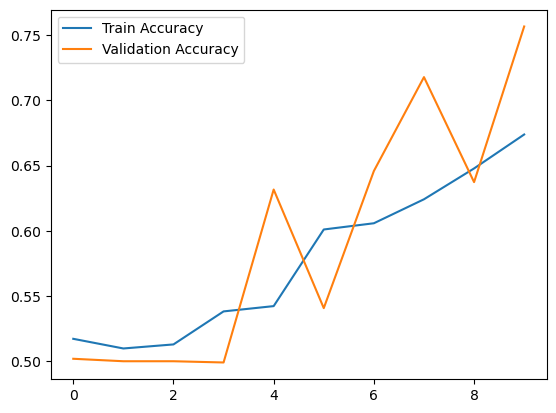

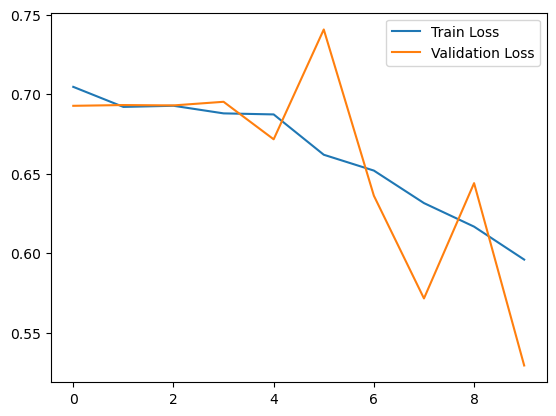

In [7]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()


In [8]:
loss, acc = model.evaluate(test_data)
print(f"Test Accuracy: {acc*100:.2f}%")


33/33 ━━━━━━━━━━━━━━━━━━━━ 10s 291ms/step - accuracy: 0.7566 - loss: 0.5294
Test Accuracy: 75.66%


In [9]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Pick an image
img_path = "AI_Pain_Data/test/no_pain/1011429980_NoPain_woman_Old_left.jpg"

img = image.load_img(img_path, target_size=img_size)
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)
predicted_class = np.argmax(prediction, axis=1)

print("Predicted class:", list(train_data.class_indices.keys())[predicted_class[0]])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
Predicted class: no_pain


In [10]:
model.save("Pain_Classification.h5")